In [1]:
!wget "https://drive.google.com/uc?export=download&id=1-5pD7_ikhlFC-pJpd1za0jz6vSP-I390" -O 'fashion-mnist.pkl'

--2020-04-17 15:04:10--  https://drive.google.com/uc?export=download&id=1-5pD7_ikhlFC-pJpd1za0jz6vSP-I390
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.102, 74.125.195.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sqqcsfnu5nhlsojfo1s5bcsajr6uij64/1587135825000/18335285753778393553/*/1-5pD7_ikhlFC-pJpd1za0jz6vSP-I390?e=download [following]
--2020-04-17 15:04:12--  https://doc-0k-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sqqcsfnu5nhlsojfo1s5bcsajr6uij64/1587135825000/18335285753778393553/*/1-5pD7_ikhlFC-pJpd1za0jz6vSP-I390?e=download
Resolving doc-0k-88-docs.googleusercontent.com (doc-0k-88-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0k-88-docs.googleusercontent.com (doc-0k

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pickle
from sklearn.metrics import accuracy_score

np.random.seed = 1
im_s = 28

In [0]:
with open('fashion-mnist.pkl', 'rb') as f:
    (x_train, y_train, x_test, y_test) = pickle.load(f)

In [0]:
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, h, w, n_row, n_col):
    plt.figure(figsize=(1.5 * n_col, 1.5 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

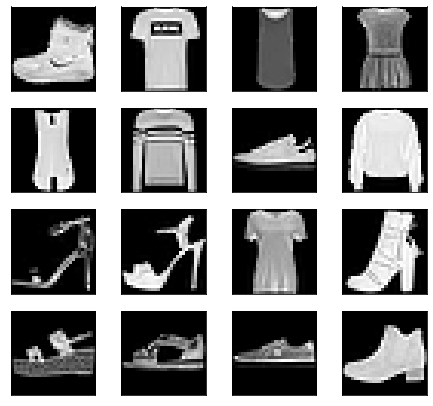

In [5]:
x_train, x_test = x_train.reshape(-1, im_s*im_s), x_test.reshape(-1, im_s*im_s)
plot_portraits(x_train, im_s, im_s, 4, 4)

In [0]:
print(np.shape(train))

(60000, 784)


In [0]:
covar_matrix = PCA(n_components = 784) #we have 784 features

In [7]:
covar_matrix.fit(x_train)
variance = covar_matrix.explained_variance_ratio_ #calculate eign values

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=4)*100)
var #cumulative sum 

array([29.04, 46.8 , 52.82, 57.78, 61.63, 65.09, 67.43, 69.34, 70.69,
       72.  , 72.99, 73.9 , 74.67, 75.33, 75.94, 76.53, 77.08, 77.6 ,
       78.06, 78.52, 78.95, 79.36, 79.74, 80.11, 80.47, 80.82, 81.15,
       81.47, 81.78, 82.07, 82.35, 82.62, 82.88, 83.14, 83.39, 83.63,
       83.86, 84.09, 84.31, 84.52, 84.72, 84.92, 85.11, 85.29, 85.47,
       85.64, 85.81, 85.97, 86.13, 86.28, 86.43, 86.58, 86.73, 86.87,
       87.01, 87.15, 87.28, 87.41, 87.54, 87.67, 87.79, 87.91, 88.03,
       88.15, 88.27, 88.38, 88.49, 88.6 , 88.71, 88.81, 88.91, 89.01,
       89.11, 89.21, 89.3 , 89.39, 89.48, 89.57, 89.66, 89.75, 89.84,
       89.92, 90.  , 90.08, 90.16, 90.24, 90.32, 90.4 , 90.48, 90.56,
       90.63, 90.7 , 90.77, 90.84, 90.91, 90.98, 91.05, 91.12, 91.19,
       91.26, 91.32, 91.38, 91.44, 91.5 , 91.56, 91.62, 91.68, 91.74,
       91.8 , 91.86, 91.92, 91.98, 92.04, 92.1 , 92.16, 92.21, 92.26,
       92.31, 92.36, 92.41, 92.46, 92.51, 92.56, 92.61, 92.66, 92.71,
       92.76, 92.81,

In [8]:
print(np.where(var == np.max(var))[0][0] - 1)

524


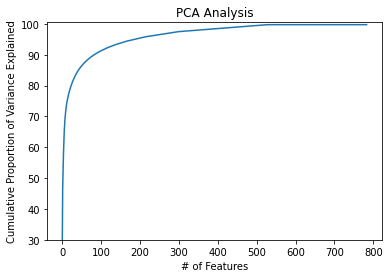

In [9]:
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [0]:
def naivebayes_pca(comps, x_train, x_test, y_train, y_test):

  if(comps < 1):

    pca = PCA(n_components=comps, svd_solver='full')
    reduced_train = pca.fit_transform(x_train)
    reduced_test = pca.transform(x_test)

  else:
    pca = PCA(n_components=comps)
    reduced_train = pca.fit_transform(x_train)
    reduced_test = pca.transform(x_test)

  gnb = GaussianNB()
  y_pred = gnb.fit(reduced_train, y_train).predict(reduced_test)

  acc = accuracy_score(y_test, y_pred)

  return acc

In [11]:
print("Number of fetures to cover 95% variance: ")
print("Accuracy: ", naivebayes_pca(0.95, x_train, x_test, y_train, y_test))


print("Number of fetures to cover 90% variance")
print("Accuracy: ", naivebayes_pca(0.90, x_train, x_test, y_train, y_test))

print("Number of fetures= 19")
print("Accuracy: ", naivebayes_pca(19, x_train, x_test, y_train, y_test))

print("Number of fetures= 30")
print("Accuracy: ", naivebayes_pca(30, x_train, x_test, y_train, y_test))

Number of fetures to cover 95% variance: 
Accuracy:  0.7369
Number of fetures to cover 90% variance
Accuracy:  0.7639
Number of fetures= 19
Accuracy:  0.7373
Number of fetures= 30
Accuracy:  0.7596


In [18]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(1))
x = sel.fit_transform(x_train)
print(np.shape(x)[1])

test = sel.transform(x_test)

gnb = GaussianNB()
y_pred = gnb.fit(x, y_train).predict(test)

acc = accuracy_score(y_test, y_pred)
print("Fetures with variance > 1")
print("Accuracy: ", acc)


779
Fetures with variance > 1
Accuracy:  0.592


In [0]:
pca = PCA(n_components=3)
reduced_train = pca.fit_transform(x_train)
reduced_test = pca.transform(x_test)

In [20]:
import plotly.express as px
import pandas as pd


Df = pd.DataFrame(data = reduced_train
             , columns = ['component 1', 'component 2', 'component 3'])

Df['label'] = y_train

Df


,component 1,component 2,component 3,label
0,-123.993791,1633.074396,-1211.041194,9
1,1407.928853,-451.641336,-261.026959,0
2,-725.910795,-1101.838138,106.154311,0
3,31.398664,-981.067672,202.580959,3
4,804.119258,-1201.168720,-744.377235,0
...,...,...,...,...
59995,-1725.093422,-41.582509,324.750636,5
59996,-27.515977,-1454.424894,-455.664290,1
59997,857.750196,-1180.240184,-520.693896,3
59998,-807.476526,-581.218873,480.319990,0


In [22]:
fig = px.scatter_3d(Df, x='component 1', y='component 2', z='component 3',
              color='label')
fig.show()